# Machine Learning Model for Predicting a Ship's Crew Size

We build a simple model using the cruise_ship_info.csv data set for predicting a ship's crew size. 

This project is organised as follows: 

(a) data preprocessing and variable selection

(b) basic regression model

(c) hyper-parameters tuning

(d) techniques for dimensionality reduction

Author: Rinaldo Gagiano --- Data: 23/9/20

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import/Preview Dataset

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/bot13956/ML_Model_for_Predicting_Ships_Crew_Size/master/cruise_ship_info.csv")

In [8]:
df.head(10)

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00
5,Ecstasy,Carnival,22,70.367,20.52,8.55,10.20,34.29,9.20
6,Elation,Carnival,15,70.367,20.52,8.55,10.20,34.29,9.20
7,Fantasy,Carnival,23,70.367,20.56,8.55,10.22,34.23,9.20
8,Fascination,Carnival,19,70.367,20.52,8.55,10.20,34.29,9.20
9,Freedom,Carnival,6,110.239,37.00,9.51,14.87,29.79,11.50


## Summary Statistics of Dataset

In [10]:
df.describe()

,Age,Tonnage,passengers,length,cabins,passenger_density,crew
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,15.689873,71.284671,18.457405,8.130633,8.830000,39.900949,7.794177
std,7.615691,37.229540,9.677095,1.793474,4.471417,8.639217,3.503487
min,4.000000,2.329000,0.660000,2.790000,0.330000,17.700000,0.590000
25%,10.000000,46.013000,12.535000,7.100000,6.132500,34.570000,5.480000
50%,14.000000,71.899000,19.500000,8.555000,9.570000,39.085000,8.150000
75%,20.000000,90.772500,24.845000,9.510000,10.885000,44.185000,9.990000
max,48.000000,220.000000,54.000000,11.820000,27.000000,71.430000,21.000000


Column Name Extraction:

In [15]:
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']

Seaborn Pair Plot Variable by Variable:

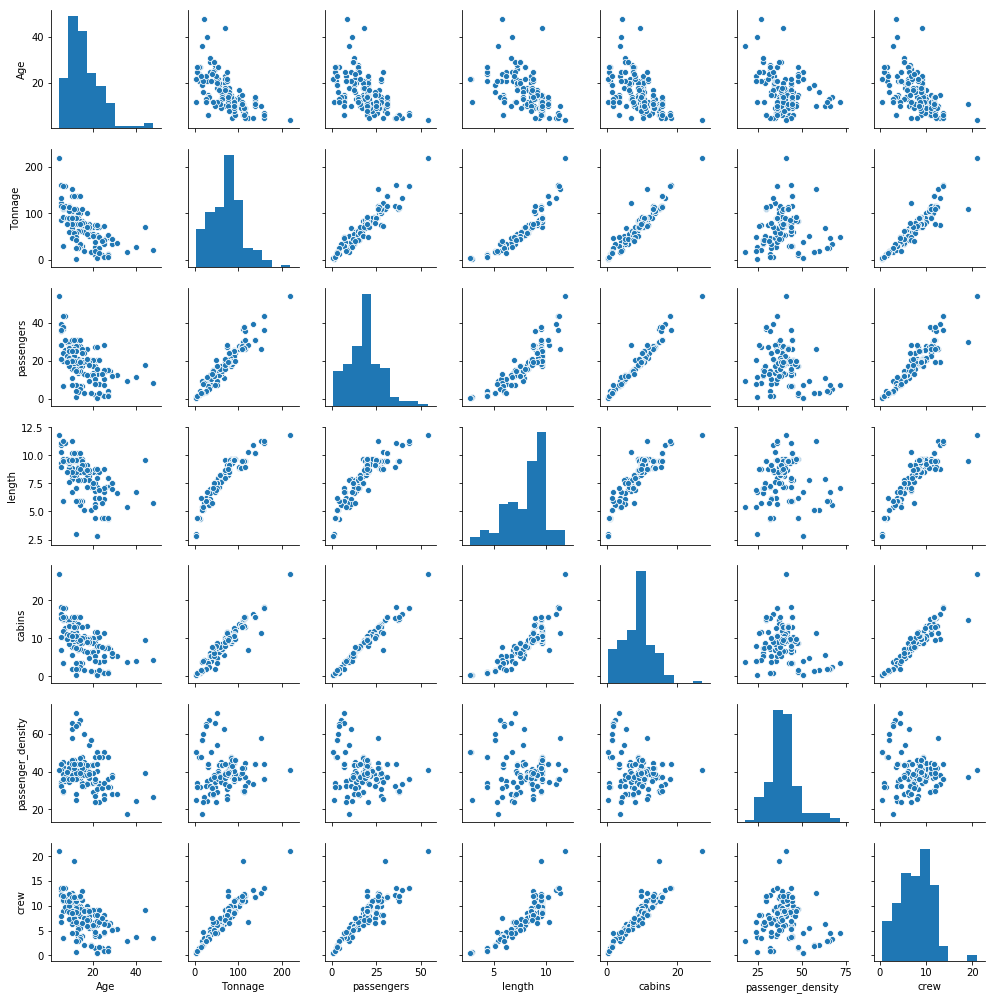

In [19]:
sns.pairplot(df[cols], height=2.0)

### Observations from Pair Plot

1) Variable ranges vary. Age consists of 0-48 whereas Tonnage consists of 0-220, see probability density plots below. These scales need to be adjusted for in order to fit into ml models. 

2) Already we can see key indications that the target variable 'Crew' correlates closely with 4 other variables; Tonnage, Passengers, Length, and Cabins. 

/Users/Rinaldo/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


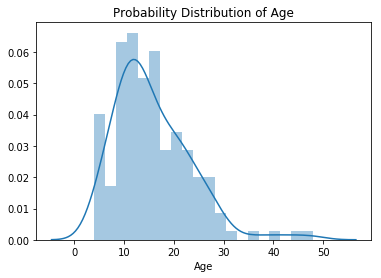

In [20]:
sns.distplot(df['Age'],bins=20)
plt.title('Probability Distribution of Age')
plt.show()

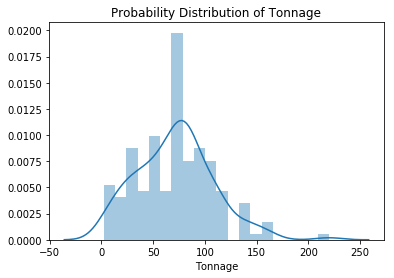

In [21]:
sns.distplot(df['Tonnage'],bins=20)
plt.title('Probability Distribution of Tonnage')
plt.show()



## Variable Selection for Prediction 

### Calculation of Covariance Matrix

In [23]:
cols = ['Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_std = stdsc.fit_transform(df[cols].iloc[:,:].values)

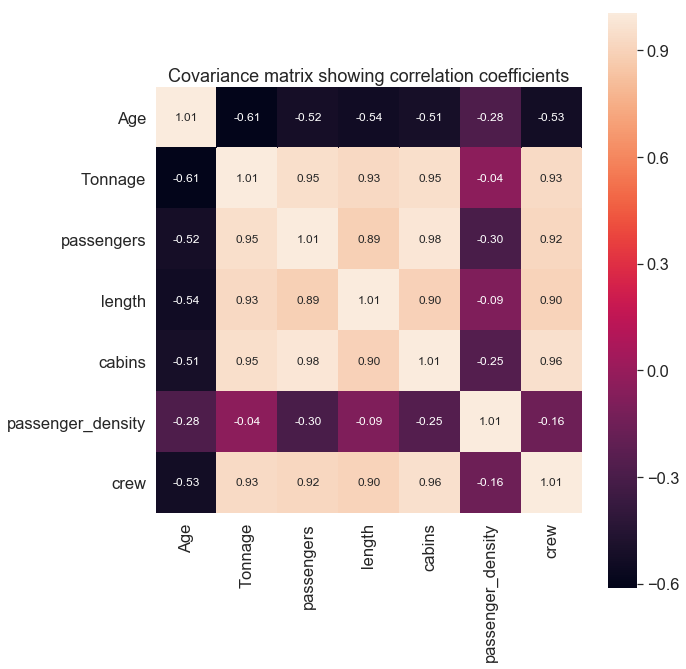

In [24]:
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(10,10))
sns.set(font_scale=1.5)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 12},
                 yticklabels=cols,
                 xticklabels=cols)
plt.title('Covariance matrix showing correlation coefficients')
plt.tight_layout()
plt.show()

### Observation from Covariance Matrix

From the matrix we can see that the 'Crew' variable correlates strongly with the 4 predictors noticed in the pair plot; 'Tonnage', 'Passengers', 'length', and 'cabins'.

## Categorical Feature Correlation Check

### One-hot encoding for categorical features

In [45]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(categorical_features=[0 ,1])
cat_df = pd.get_dummies(df[['Ship_name', 'Cruise_line','Age', 'Tonnage', 'passengers', 'length', 'cabins','passenger_density','crew']])
cat_df.head(10)

,Age,Tonnage,passengers,length,cabins,passenger_density,crew,Ship_name_Adventure,Ship_name_Allegra,Ship_name_Amsterdam,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,30.277,6.94,5.94,3.55,42.64,3.55,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,47.262,14.86,7.22,7.43,31.80,6.70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11,110.000,29.74,9.53,14.88,36.99,19.10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,101.353,26.42,8.92,13.21,38.36,10.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,22,70.367,20.52,8.55,10.20,34.29,9.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,15,70.367,20.52,8.55,10.20,34.29,9.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,23,70.367,20.56,8.55,10.22,34.23,9.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,19,70.367,20.52,8.55,10.20,34.29,9.20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,6,110.239,37.00,9.51,14.87,29.79,11.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
cat_df2 = cat_df.iloc[:,6:]
cat_df2.head()

,crew,Ship_name_Adventure,Ship_name_Allegra,Ship_name_Amsterdam,Ship_name_Arcadia,Ship_name_Aries,Ship_name_Armonia,Ship_name_Artemis,Ship_name_Atlantica,Ship_name_Aurora,...,Cruise_line_Oceania,Cruise_line_Orient,Cruise_line_P&O,Cruise_line_Princess,Cruise_line_Regent_Seven_Seas,Cruise_line_Royal_Caribbean,Cruise_line_Seabourn,Cruise_line_Silversea,Cruise_line_Star,Cruise_line_Windstar
0,3.55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3.55,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6.70,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,19.10,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10.00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
cat_df2['Categorical Feature Count']= cat_df2.iloc[:, 1:].sum(axis=1)
cat_df2['Categorical Feature Count'].head()

0    2
1    2
2    2
3    2
4    2
Name: Categorical Feature Count, dtype: int64

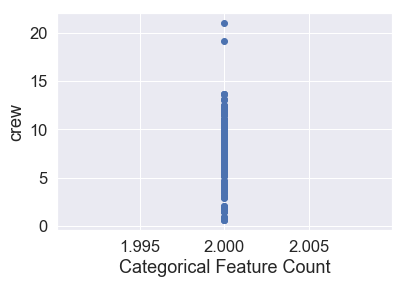

In [77]:
plt.scatter(cat_df2['Categorical Feature Count'],cat_df2['crew'])
plt.xlabel('Categorical Feature Count')
plt.ylabel('crew')
plt.show()

## Observation of Categorical Feature Scatterplot

We can see that none of the observations in the variables 'Ship_name' or 'Cruise_line' help to determine Crew Size. We will therefore leave out these predictors and focus on the four strongest predictors: Tonnage', 'Passengers', 'length', and 'cabins'.

## Subsetting Predictor and Target Variables

In [25]:
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']

In [26]:
df[cols_selected].head()

,Tonnage,passengers,length,cabins,crew
0,30.277,6.94,5.94,3.55,3.55
1,30.277,6.94,5.94,3.55,3.55
2,47.262,14.86,7.22,7.43,6.70
3,110.000,29.74,9.53,14.88,19.10
4,101.353,26.42,8.92,13.21,10.00


## Data Partitioning into Training and Testing Sets

In [88]:
from sklearn.model_selection import train_test_split
pred = df[cols_selected].iloc[:,0:4].values     
target = df[cols_selected]['crew']

In [91]:
pred_train, pred_test, target_train, target_test = train_test_split( pred, target, test_size=0.4, random_state=0)

## Building of Multi-Regression Model

In [92]:
from sklearn.linear_model import LinearRegression
slr = LinearRegression()

slr.fit(pred_train, y_train)
y_train_pred = slr.predict(pred_train)
y_test_pred = slr.predict(pred_test)

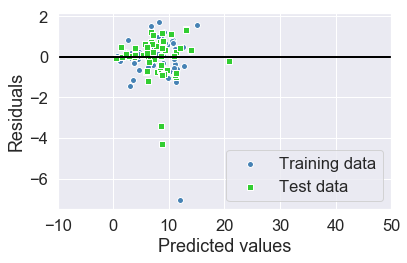

In [96]:
plt.scatter(y_train_pred,  y_train_pred - target_train,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - target_test,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()
plt.legend(loc='lower right')
plt.show()

## Evaluation of regression model

In [98]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(target_train, y_train_pred),
        mean_squared_error(target_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(target_train, y_train_pred),
        r2_score(target_test, y_test_pred)))

MSE train: 0.955, test: 0.889
R^2 train: 0.920, test: 0.928


The evaluation is indicating that our model is prediciting fairly accurately against our test data, with MSE = 0.889 and R^2 = 0.928. This accuracy may be increase with the tuning of parameters.

## Feature Standardization, Cross Validation, and Hyper-parameter Tuning

In [99]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
X = df[cols_selected].iloc[:,0:4].values     
y = df[cols_selected]['crew']  
from sklearn.preprocessing import StandardScaler
sc_y = StandardScaler()
sc_x = StandardScaler()
y_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()

In [100]:
train_score = []
test_score = []

In [101]:
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=i)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import Pipeline
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=4)),('slr', LinearRegression())])
    pipe_lr.fit(X_train, y_train_std)
    y_train_pred_std=pipe_lr.predict(X_train)
    y_test_pred_std=pipe_lr.predict(X_test)
    y_train_pred=sc_y.inverse_transform(y_train_pred_std)
    y_test_pred=sc_y.inverse_transform(y_test_pred_std)
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))

In [102]:
train_score

array([0.92028261, 0.91733937, 0.94839385, 0.93899476, 0.90621451,
       0.91156903, 0.92726066, 0.94000795, 0.93922948, 0.93629554])

In [104]:
test_score

array([0.92827978, 0.93807946, 0.8741834 , 0.89901199, 0.94781315,
       0.91880183, 0.91437408, 0.89660876, 0.90427477, 0.90139208])

In [107]:
print('R2 train: %.3f +/- %.3f' % (np.mean(train_score),np.std(train_score)))
print('R2 test: %.3f +/- %.3f' % (np.mean(test_score),np.std(test_score)))

R2 train: 0.929 +/- 0.013
R2 test: 0.912 +/- 0.021


## Techniques of Dimensionality Reduction

### Principal Component Analysis (PCA)

In [119]:
train_score = []
test_score = []
cum_variance = []

In [120]:
 for i in range(1,5):
    X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
    y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    from sklearn.linear_model import LinearRegression
    from sklearn.pipeline import Pipeline
    pipe_lr = Pipeline([('scl', StandardScaler()),('pca', PCA(n_components=i)),('slr', LinearRegression())])
    pipe_lr.fit(X_train, y_train_std)
    y_train_pred_std=pipe_lr.predict(X_train)
    y_test_pred_std=pipe_lr.predict(X_test)
    y_train_pred=sc_y.inverse_transform(y_train_pred_std)
    y_test_pred=sc_y.inverse_transform(y_test_pred_std)
    train_score = np.append(train_score, r2_score(y_train, y_train_pred))
    test_score = np.append(test_score, r2_score(y_test, y_test_pred))
    cum_variance = np.append(cum_variance, np.sum(pipe_lr.fit(X_train, y_train).named_steps['pca'].explained_variance_ratio_))

In [121]:
print('Train Score:',train_score)
print('Test Score:',test_score)
print('Cumulative Score:',cum_variance)

Train Score: [0.90411898 0.9041488  0.90416405 0.92028261]
Test Score: [0.89217843 0.89174896 0.89159266 0.92827978]
Cumulative Score: [0.949817   0.98322819 0.99587366 1.        ]


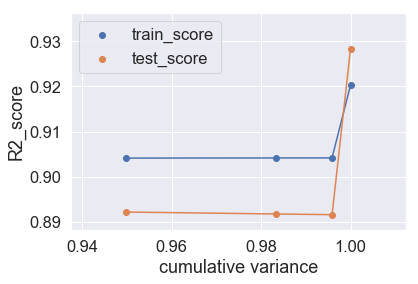

In [122]:
plt.scatter(cum_variance,train_score, label = 'train_score')
plt.plot(cum_variance, train_score)
plt.scatter(cum_variance,test_score, label = 'test_score')
plt.plot(cum_variance, test_score)
plt.xlabel('cumulative variance')
plt.ylabel('R2_score')
plt.legend()
plt.show()

### Observations for PCA

We observe that by increasing the number of principal components from 1 to 4, the train and test scores improve. This is because with less components, there is high bias error in the model, since model is overly simplified. As we increase the number of principal components, the bias error will reduce, but complexity in the model increases.

### Regularized Regression: Lasso

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, random_state=0)
y_train_std = sc_y.fit_transform(y_train[:, np.newaxis]).flatten()
X_train_std = sc_x.fit_transform(X_train)
X_test_std = sc_x.transform(X_test)

In [144]:
alpha = np.linspace(0.01,0.4,10)

In [145]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.7)

r2_train=[]
r2_test=[]
norm = []
for i in range(10):
    lasso = Lasso(alpha=alpha[i])
    lasso.fit(X_train_std,y_train_std)
    y_train_std=lasso.predict(X_train_std)
    y_test_std=lasso.predict(X_test_std)
    r2_train=np.append(r2_train,r2_score(y_train,sc_y.inverse_transform(y_train_std)))
    r2_test=np.append(r2_test,r2_score(y_test,sc_y.inverse_transform(y_test_std)))
    norm= np.append(norm,np.linalg.norm(lasso.coef_))

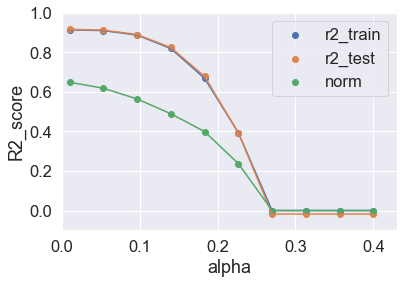

In [146]:
plt.scatter(alpha,r2_train,label='r2_train')
plt.plot(alpha,r2_train)
plt.scatter(alpha,r2_test,label='r2_test')
plt.plot(alpha,r2_test)
plt.scatter(alpha,norm,label = 'norm')
plt.plot(alpha,norm)
plt.ylim(-0.1,1)
plt.xlim(0,.43)
plt.xlabel('alpha')
plt.ylabel('R2_score')
plt.legend()
plt.show()

### Observations for Lasso

We observe that as the regularization parameter $\alpha$ increases, the norm of the regression coefficients become smaller and smaller. This means more regression coefficients are forced to zero, which intend increases bias error (over simplification). The best value to balance bias-variance tradeoff is when $\alpha$ is kept low, say $\alpha = 0.1$ or less.